In [2]:
# !pip install seaborn

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load Data

In [4]:
br_pd = pd.read_csv('./data/br.csv')
viscode_pd = pd.read_csv('./data/viscode.csv')
score_pd = pd.read_csv('./data/score.csv')
srl_s_pd = pd.read_csv('./data/srl_strategy.csv')
srl_m_pd = pd.read_csv('./data/srl_motivation.csv')
sill_pd = pd.read_csv('./data/sill.csv')

# Data Characteristics

## score

In [5]:
score_pd.nunique()

userid    467
score      74
class       9
dtype: int64

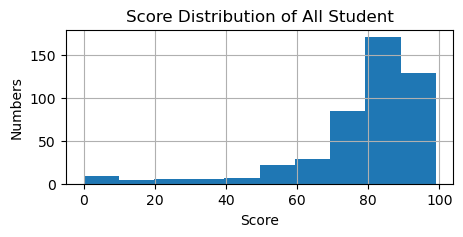

In [6]:
plt.figure(figsize=(5, 2))
score_pd['score'].hist(bins=10)
plt.title('Score Distribution of All Student')
plt.ylabel('Numbers')
plt.xlabel('Score')
plt.savefig('./data_plot/score')
plt.show()

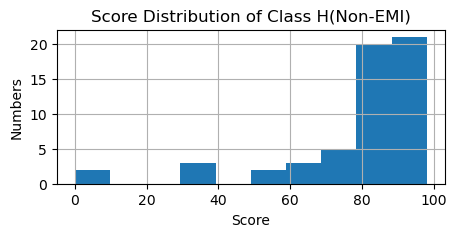

In [7]:
plt.figure(figsize=(5, 2))
score_pd[score_pd['class']=='h']['score'].hist(bins=10)

plt.title('Score Distribution of Class H(Non-EMI)')
plt.ylabel('Numbers')
plt.xlabel('Score')
plt.show()

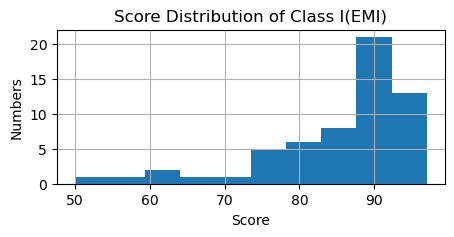

In [8]:
plt.figure(figsize=(5, 2))
score_pd[score_pd['class']=='i']['score'].hist(bins=10)

plt.title('Score Distribution of Class I(EMI)')
plt.ylabel('Numbers')
plt.xlabel('Score')
plt.show()

a


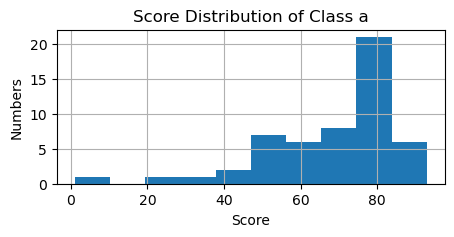

b


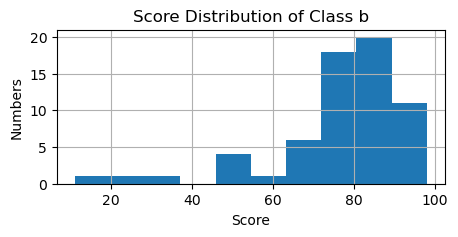

c


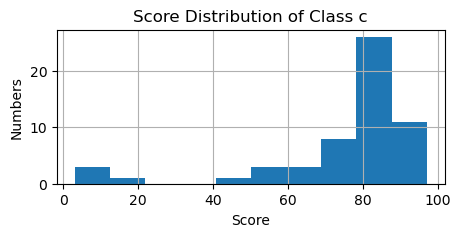

d


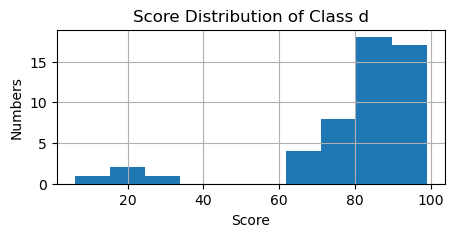

e


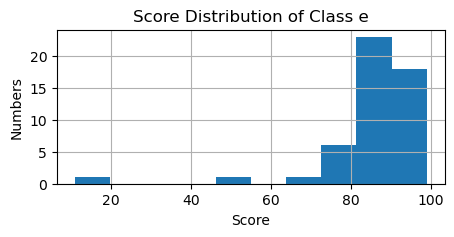

f


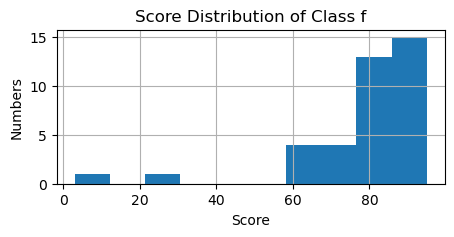

g


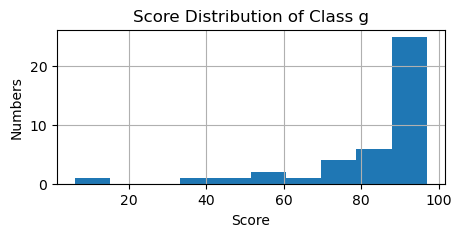

h


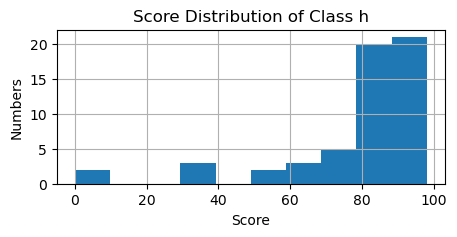

i


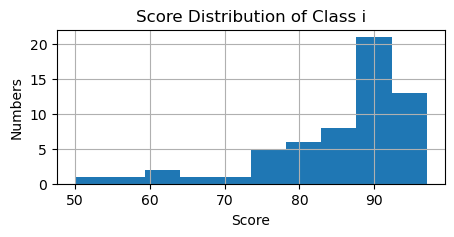

In [9]:
def Plot_Score():
    classID = 'abcdefghi'
    for cid in classID :
        print(cid)
        plt.figure(figsize=(5, 2))
        score_pd[score_pd['class']==cid]['score'].hist(bins=10)

        plt.title('Score Distribution of Class ' + cid )
        plt.ylabel('Numbers')
        plt.xlabel('Score')
        save_path = './data_plot/score_'+cid
        plt.savefig(save_path)
        plt.show()
Plot_Score()

# Data Statistics

# SILL

In [10]:
sill_pd = pd.read_csv('./data/sill.csv')

In [11]:
# Calculate Standard Deviation & Delete the data which sd=0 
question_list = sill_pd.columns[1:49]
sill_pd['sd'] = sill_pd[question_list].std(axis=1)
keep_list = sill_pd['sd'] > 0
sill_pd = sill_pd[keep_list]

'''
    Merge by Category 
    ---------------------------
    category      : Question number
    ---------------------------
    memory        : 1-8 (8)
    cognitive     : 9-21 (13)
    compensation  : 22-27 (6)
    metacognitive : 28-36 (9)
    affective     : 37-42 (6)
    social        : 43-48 (6)
'''

memory_list = sill_pd.columns[1:9]
cognitive_list = sill_pd.columns[9:22]
compensation_list = sill_pd.columns[22:28]
metacognitive_list = sill_pd.columns[28:37]
affective_list = sill_pd.columns[37:43]
social_list = sill_pd.columns[43:49]

sill_pd['memory'] = sill_pd[memory_list].sum(axis=1)/8
sill_pd['cognitive'] = sill_pd[cognitive_list].sum(axis=1)/13
sill_pd['compensation'] = sill_pd[compensation_list].sum(axis=1)/6
sill_pd['metacognitive'] = sill_pd[metacognitive_list].sum(axis=1)/9
sill_pd['affective'] = sill_pd[affective_list].sum(axis=1)/6
sill_pd['social'] = sill_pd[social_list].sum(axis=1)/6

# keep data with same category
keep_list = ['userid', 'memory', 'cognitive', 'compensation', 'metacognitive', 'affective', 'social']
sill_pd = sill_pd[keep_list]
sill_pd = sill_pd.reset_index()
sill_pd = sill_pd.drop('index', axis=1)
sill_pd

,userid,memory,cognitive,compensation,metacognitive,affective,social
0,b1dfc5c6ec04d46d1823c5fa972ad320,3.500,4.307692,3.333333,5.000000,3.500000,3.000000
1,4e3519d7eafbfccdae231756fcf2ce9c,3.000,3.000000,2.833333,3.000000,3.833333,3.500000
2,0cebfa477ed3e2e0c5a3f9aa96c23698,4.875,4.846154,4.500000,4.888889,4.500000,4.333333
3,379bbc4c2c728db0a249e8c4e6b621af,3.250,5.000000,4.666667,4.666667,3.833333,5.000000
4,a92f1708363527a34d93b0bc7840262c,3.125,3.538462,3.833333,3.888889,3.500000,2.833333
...,...,...,...,...,...,...,...
245,c5721f60eac3a50a10fc9a59881aac29,1.750,2.615385,3.000000,2.333333,1.000000,2.500000
246,c9febcf368ffb0af2ec61cde63302683,2.000,2.000000,2.000000,3.333333,4.000000,3.166667
247,34a57f4705fa2af6bfc354453ff4f432,2.250,2.461538,2.666667,2.666667,2.333333,3.000000
248,ffc7749aa8337fadddcbd42d9cf6e5ec,3.500,3.538462,3.666667,3.888889,2.833333,3.666667


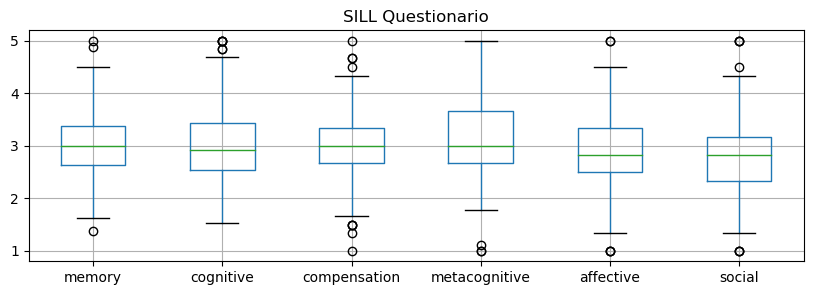

In [12]:
plt.figure(figsize=(10, 3))
sill_pd.boxplot()
plt.title('SILL Questionario')
plt.savefig('./data_plot/sill')
plt.show()

In [13]:
merged_pd = pd.merge(sill_pd, score_pd, on='userid', how='outer')

In [14]:
corr = merged_pd.corr()
corr.style.background_gradient(cmap='coolwarm')

C:\Users\MarkLin\AppData\Local\Temp\ipykernel_7316\452242710.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = merged_pd.corr()


,memory,cognitive,compensation,metacognitive,affective,social,score
memory,1.000000,0.687447,0.521149,0.622377,0.583888,0.482045,-0.048312
cognitive,0.687447,1.000000,0.720935,0.734674,0.515931,0.660646,0.032459
compensation,0.521149,0.720935,1.000000,0.607612,0.428731,0.628517,-0.001401
metacognitive,0.622377,0.734674,0.607612,1.000000,0.706362,0.597981,-0.060595
affective,0.583888,0.515931,0.428731,0.706362,1.000000,0.456871,-0.134026
social,0.482045,0.660646,0.628517,0.597981,0.456871,1.000000,-0.084982
score,-0.048312,0.032459,-0.001401,-0.060595,-0.134026,-0.084982,1.000000


In [15]:
corr = merged_pd.corr()
corr

C:\Users\MarkLin\AppData\Local\Temp\ipykernel_7316\1909979388.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = merged_pd.corr()


,memory,cognitive,compensation,metacognitive,affective,social,score
memory,1.000000,0.687447,0.521149,0.622377,0.583888,0.482045,-0.048312
cognitive,0.687447,1.000000,0.720935,0.734674,0.515931,0.660646,0.032459
compensation,0.521149,0.720935,1.000000,0.607612,0.428731,0.628517,-0.001401
metacognitive,0.622377,0.734674,0.607612,1.000000,0.706362,0.597981,-0.060595
affective,0.583888,0.515931,0.428731,0.706362,1.000000,0.456871,-0.134026
social,0.482045,0.660646,0.628517,0.597981,0.456871,1.000000,-0.084982
score,-0.048312,0.032459,-0.001401,-0.060595,-0.134026,-0.084982,1.000000


<Axes: >

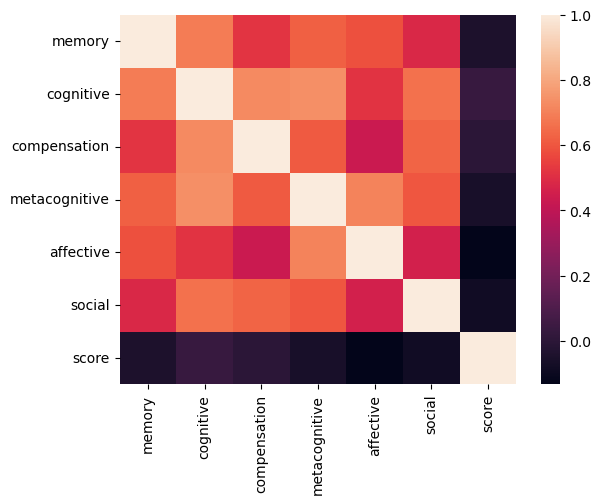

In [16]:
sns.heatmap(corr)

# SRL Motivation

In [17]:
srl_motivate_pd = pd.read_csv('./structured-data/srl_motivation.csv')

FileNotFoundError: [Errno 2] No such file or directory: './structured-data/srl_motivation.csv'

In [ ]:
# Calculate Standard Deviation & Delete the data which sd=0
question_list = srl_motivate_pd.columns[1:32]
srl_motivate_pd['sd'] = srl_motivate_pd[question_list].std(axis=1)
keep_list = srl_motivate_pd['sd'] > 0
srl_motivate_pd = srl_motivate_pd[keep_list]
srl_motivate_pd

'''
    Merge by Category 
    ---------------------------
    category      : Question number
    ---------------------------
    intrinsic       : 1-4 (4)
    extrinsic       : 5-8 (4)
    task_value      : 9-14 (6)
    control_beliefs : 15-18 (4)
    self_efficacy   : 19-26 (8)
    test_anxiety    : 27-31 (5)
'''

# classify data with same category
i = 1
intrinsic_goal_orientation = srl_motivate_pd.columns[i:i+4]
i = i + 4
extrinsic_goal_orientation = srl_motivate_pd.columns[i:i+4]
i = i + 4
task_value = srl_motivate_pd.columns[i:i+6]
i = i + 6
control_beliefs = srl_motivate_pd.columns[i:i+4]
i = i + 4
self_efficacy_and_performance = srl_motivate_pd.columns[i:i+8]
i = i + 8
test_anxiety = srl_motivate_pd.columns[i:i+5]


srl_motivate_pd['intrinsic'] = srl_motivate_pd[intrinsic_goal_orientation].sum(axis=1)/4
srl_motivate_pd['extrinsic'] = srl_motivate_pd[extrinsic_goal_orientation].sum(axis=1)/4
srl_motivate_pd['task_value'] = srl_motivate_pd[task_value].sum(axis=1)/6
srl_motivate_pd['control_beliefs'] = srl_motivate_pd[control_beliefs].sum(axis=1)/4
srl_motivate_pd['self_efficacy'] = srl_motivate_pd[self_efficacy_and_performance].sum(axis=1)/8
srl_motivate_pd['test_anxiety'] = srl_motivate_pd[test_anxiety].sum(axis=1)/5

# keep data with same category
keep_list = ['userid', 'intrinsic', 'extrinsic', 'task_value', 'control_beliefs', 'self_efficacy', 'test_anxiety']
srl_motivate_pd = srl_motivate_pd[keep_list]
srl_motivate_pd = srl_motivate_pd.reset_index()
srl_motivate_pd = srl_motivate_pd.drop('index', axis=1)
srl_motivate_pd

In [ ]:
plt.figure(figsize=(10, 3))
srl_motivate_pd.boxplot()
plt.title('SRL Motivate Questionario')
plt.savefig('./data_plot/srl_motivation')
plt.show()

In [ ]:
merged_pd = pd.merge(srl_motivate_pd, score_pd, on='userid', how='outer')

In [ ]:
corr = merged_pd.corr()
corr.style.background_gradient(cmap='coolwarm')

In [ ]:
corr = merged_pd.corr()
corr

In [ ]:
sns.heatmap(corr)

# SRL Strategy

In [ ]:
srl_strategy_pd = pd.read_csv('./structured-data/srl_strategy.csv')

In [ ]:
# Calculate Standard Deviation & Delete the data which sd=0
question_list = srl_strategy_pd.columns[1:51]
srl_strategy_pd['sd'] = srl_strategy_pd[question_list].std(axis=1)
keep_list = srl_strategy_pd['sd'] > 0
srl_strategy_pd = srl_strategy_pd[keep_list]


'''
    Merge by Category 
    ---------------------------
    category      : Question number
    ---------------------------
    rehearsal         : 1-4    (4)
    elaboration       : 5-10   (6)
    organization      : 11-14  (4)
    critical_thinking : 15-19  (5)
    metacognitive_self_regulation   : 20-31 (12)
    time_environment  : 32-39  (8)
    effort_regulation : 40-43  (4)
    peer_learning     : 44-46  (3)
    help_seeking      : 47-50  (4)
'''

# classify data with same category
i = 1
rehearsal = srl_strategy_pd.columns[i:i+4]
i = i + 4
elaboration = srl_strategy_pd.columns[i:i+6]
i = i + 6
organization = srl_strategy_pd.columns[i:i+4]
i = i + 4
critical_thinking = srl_strategy_pd.columns[i:i+5]
i = i + 5
metacognitive_self_regulation = srl_strategy_pd.columns[i:i+12]
i = i + 12
time_environment = srl_strategy_pd.columns[i:i+8]
i = i + 8
effort_regulation = srl_strategy_pd.columns[i:i+4]
i = i + 4
peer_learning = srl_strategy_pd.columns[i:i+3]
i = i + 3
help_seeking = srl_strategy_pd.columns[i:i+4]


# avg
srl_strategy_pd['rehearsal'] = srl_strategy_pd[rehearsal].sum(axis=1) / 4
srl_strategy_pd['elaboration'] = srl_strategy_pd[elaboration].sum(axis=1) / 6
srl_strategy_pd['organization'] = srl_strategy_pd[organization].sum(axis=1) / 4
srl_strategy_pd['critical_thinking'] = srl_strategy_pd[critical_thinking].sum(axis=1)/ 5
srl_strategy_pd['metacognitive_self_regulation'] = srl_strategy_pd[metacognitive_self_regulation].sum(axis=1)/12
srl_strategy_pd['time_environment'] = srl_strategy_pd[time_environment].sum(axis=1)/8
srl_strategy_pd['effort_regulation'] = srl_strategy_pd[effort_regulation].sum(axis=1)/4
srl_strategy_pd['peer_learning'] = srl_strategy_pd[peer_learning].sum(axis=1)/3
srl_strategy_pd['help_seeking'] = srl_strategy_pd[help_seeking].sum(axis=1)/4

# keep data with same category
keep_list = ['userid', 'rehearsal', 'elaboration', 'organization', 'critical_thinking', 
             'metacognitive_self_regulation', 'time_environment', 'effort_regulation', 'peer_learning', 'help_seeking']
srl_strategy_pd = srl_strategy_pd[keep_list]
srl_strategy_pd = srl_strategy_pd.reset_index()
srl_strategy_pd = srl_strategy_pd.drop('index', axis=1)
srl_strategy_pd

In [ ]:
plt.figure(figsize=(10, 3))
srl_strategy_pd.boxplot()
plt.xticks(rotation=45)
plt.title('SRL Strategy Questionario')
results_path= './data_plot/srl_strategy'
plt.savefig(results_path, dpi='figure', bbox_inches='tight')
plt.show()

In [ ]:
merged_pd = pd.merge(srl_strategy_pd, score_pd, on='userid', how='outer')

In [ ]:
corr = merged_pd.corr()
corr.style.background_gradient(cmap='coolwarm')

In [ ]:
corr = merged_pd.corr()
corr

In [ ]:
sns.heatmap(corr)

# Questionario & Score (correlation)

In [ ]:
merged_pd = pd.merge( srl_motivate_pd, srl_strategy_pd, on='userid', how='outer')
merged_pd = pd.merge( merged_pd, sill_pd, on='userid', how='outer')
merged_pd = pd.merge( merged_pd, score_pd, on='userid', how='outer')
merged_pd

In [ ]:
plt.figure(figsize=(15, 5))
merged_pd.drop('score', axis=1).boxplot()
plt.title('Questionario')
plt.xticks(rotation='vertical')
plt.savefig('./data_plot/all_questionario', dpi='figure', bbox_inches='tight')
plt.show()

In [ ]:
corr = merged_pd.corr()
corr.style.background_gradient(cmap='coolwarm')

In [ ]:
corr = merged_pd.corr()
corr

In [ ]:
ax = plt.axes()
ax.set_title('Questionario Correlation')

sns_plot = sns.heatmap(corr)

results_path = './data_plot/Questionario_Correlation.png'
plt.savefig(results_path, dpi='figure', bbox_inches='tight')

## viscode

In [ ]:
viscode_pd = pd.read_csv('./data/viscode.csv')
viscode_pd = viscode_pd.drop(['Unnamed: 0', 'userid', 'score', 'class' ], axis=1)

In [ ]:
viscode_pd.nunique()

In [ ]:
plt.figure(figsize=(20, 3))



plt.subplot(1, 3, 1)
viscode_pd[['code_copy', 'code_execution', 'code_paste', 'notebook_open', 'tree_open']].boxplot()

plt.xticks(rotation=90)


plt.subplot(1, 3, 2)
viscode_pd[['Viscode-login_times', 'Viscode-execute_times', 'Viscode-open_file_times', 'Viscode-success_run', 'Viscode-failed_run', 'Viscode-error_types', 'Viscode-spent_time']].boxplot()
plt.xticks(rotation=90)

plt.title('VisCode Features Distribution')

# plt.subplot(1, 3, 3)
# viscode_pd[['code_speed', 'codeLength' ]].boxplot()
# plt.xticks(rotation=90)

plt.subplot(1, 3, 3)
viscode_pd.drop(['codeLength','code_copy', 'code_execution', 'code_paste', 'code_speed', 'notebook_open', 'tree_open', 'Viscode-login_times', 'Viscode-execute_times', 'Viscode-open_file_times', 'Viscode-success_run', 'Viscode-failed_run', 'Viscode-error_types', 'Viscode-spent_time'], axis=1).boxplot() # 
plt.xticks(rotation=90)




results_path = './data_plot/VisCode_Features_Distribution.png'
plt.savefig(results_path, dpi='figure', bbox_inches='tight')
plt.show()

In [ ]:
plt.figure(figsize=(15, 5))
viscode_pd[['IndentationError', 'NameError', 'SyntaxError', 'TypeError', 'AttributeError', 'KeyError']].boxplot()

In [ ]:
viscode_pd = pd.read_csv('./data/viscode.csv')
viscode_pd = viscode_pd.drop(['Unnamed: 0', 'class', 'score'], axis =1)
viscode_pd

In [ ]:
merge_pd = pd.merge(viscode_pd, score_pd, on='userid', how = 'outer')
merge_pd = merge_pd.drop( 'userid', axis =1)
merge_pd

In [ ]:
corr = merge_pd.corr()

In [ ]:
sns.heatmap(corr)

In [ ]:
ax = plt.axes()
ax.set_title('VisCode Correlation')

sns_plot = sns.heatmap(corr)

results_path = './data_plot/VisCode_Correlation.png'
plt.savefig(results_path, dpi='figure', bbox_inches='tight')

## bookroll

In [ ]:
br_pd = pd.read_csv('./data/br.csv')

In [ ]:
br_pd = br_pd.drop(['Unnamed: 0', 'userid', 'score', 'class' ], axis=1)

In [ ]:
br_pd = br_pd.drop(['ADD_RECOMMENDATION', 'CLOSE_RECOMMENDATION', 'OPEN_RECOMMENDATION', 'LINK_CLICK', 'REGIST CONTENTS'], axis=1)
br_pd

In [ ]:
plt.figure(figsize=(20, 3))


plt.subplot(1, 3, 1)
br_pd.drop(['NEXT', 'PREV','ADD MARKER', 'OPEN', 'CLOSE', 'PAGE_JUMP', 'BOOKMARK_JUMP'], axis=1).boxplot() # 
plt.xticks(rotation=90)



plt.subplot(1, 3, 2)
br_pd[['BOOKMARK_JUMP', 'PAGE_JUMP', 'ADD MARKER', 'OPEN', 'CLOSE']].boxplot()
plt.xticks(rotation=90)

plt.title('BookRoll Features Distribution')


plt.subplot(1, 3, 3)
br_pd[['NEXT', 'PREV']].boxplot()
plt.xticks(rotation=90)


results_path = './data_plot/BookRoll_Features_Distribution.png'
plt.savefig(results_path, dpi='figure', bbox_inches='tight')
plt.show()

In [ ]:
br_pd = pd.read_csv('./data/br.csv')
br_pd = br_pd.drop(['Unnamed: 0', 'class', 'score', 'ADD_RECOMMENDATION', 'REGIST CONTENTS'], axis =1)
br_pd

In [ ]:
merge_pd = pd.merge(br_pd, score_pd, on='userid', how = 'outer')
merge_pd = merge_pd.drop( 'userid', axis =1)
merge_pd

In [ ]:
corr = merge_pd.corr()
sns.heatmap(corr)

In [ ]:
ax = plt.axes()
ax.set_title('BookRoll Correlation')

sns_plot = sns.heatmap(corr)

results_path = './data_plot/BookRoll_Correlation.png'
plt.savefig(results_path, dpi='figure', bbox_inches='tight')